<h4 align="right">by <a href="http://cs-people.bu.edu/usmn/"> Ben Usman</a> <br> with help of Kate Saenko, <br> Brian Kulis and Kun He <br> </h4>
# Problem Set 1 


## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`pset1.ipynb`](https://gist.githubusercontent.com/MInner/eb6330a655a5c37b82e15d1c84fd4cd0/raw/)) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. 

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

**Q1.1**: $P(x\ |\ \theta) = \theta e^{-\theta x}, x\ge 0$ and $(x_1, x_2, \ldots, x_n)$ are i.i.d samples.  
$\therefore\ P((x_1, x_2, \ldots, x_n)\ |\ \theta) = \theta e^{-\theta x_1}\cdot \theta e^{-\theta x_2}\cdots \theta e^{-\theta x_n} = \theta^ne^{-\theta \sum_{i=1}^{n}x_i}$  
$\log P((x_1, x_2, \ldots, x_n)\ |\ \theta) = n\log\theta - \theta\sum_{i=1}^n x_i$  
$\therefore\ \frac{\partial}{\partial\theta} \log P((x_1, x_2, \ldots, x_n)\ |\ \theta) = \frac n\theta - \sum_{i=1}^n x_i = 0$  
$\implies \hat{\theta} = \frac{n}{\sum_{i=1}^n x_i}$

**Q1.2** $P(x\ |\ \theta) = \frac1\theta$ for $0 \le x \le \theta$ and $(x_1, x_2, \ldots, x_n)$ are i.i.d samples.  
$\therefore\ P((x_1, x_2, \ldots, x_n)\ |\ \theta) = \theta^{-n}$  
$\frac{\partial}{\partial\theta}P((x_1, x_2, \ldots, x_n)\ |\ \theta) = -n\theta^{-n-1} < 0 $  
$\therefore P((x_1, x_2, \ldots, x_n)\ |\ \theta)$ is monotonically decreasing, reaches its maximum at the minimum of $\theta$.  
$\because\ \theta \ge x$  
$\therefore\ \hat{\theta} = 0$

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times k}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point
- $\theta$ is a $k$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**Q2.1** $\mathcal{L}_i(\theta) = -\log P(y_i \ | \ \mathbf x_i, \theta, v) = \log Z(v) + \frac{v+1}2 \log \left( 1 + \frac{(\theta^T\mathbf x_i - y_i)^2}v \right)$  
$$
\therefore\ \frac{\partial}{\partial \theta} \mathcal{L}_i(\theta) = \frac{v+1}2 \cdot \frac{\frac{2(\theta^T\mathbf x_i - y_i)}v \mathbf x_i}{1 + \frac{(\theta^T\mathbf x_i - y_i)^2}v}
$$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result. Consider $Z(v)=1$ and $v=4$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

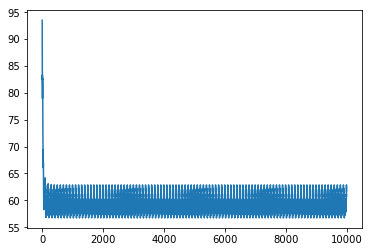

The final logloss value for learning rate = 0.1 is 61.648199515738966


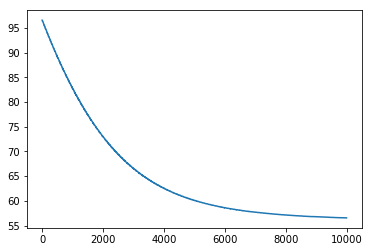

The final logloss value for learning rate = 0.001 is 56.54411638551106


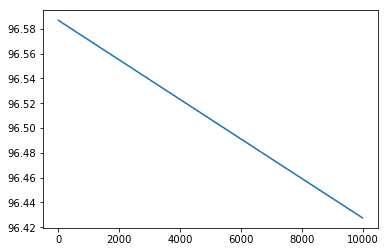

The final logloss value for learning rate = 1e-06 is 96.4275915057976


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, k=10, v=4):
    X = np.random.rand(n, k)*2-1
    theta = np.random.rand(k, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta, v):
    ## ! -- code required
    # loss_vect = (X.dot(theta) - y)**2
    loss_vect = (v + 1)/2 * np.log(1 + (X.dot(theta) - y)**2/v)
    return loss_vect

def loss_grad_i(X, y, theta, i, lrate, v):
    ## ! -- code required
    X_i = X[i, :]
    y_i = y[i]
    # grad = 2*lrate*(X_i.dot(theta) - y_i)*X_i
    grad = lrate * (v + 1) * (X_i.dot(theta) - y_i)*X_i / (v + (X_i.dot(theta) - y_i)**2)
    return grad

def sgd_plot(theta_init, X, y, v, n_steps=100):
    for learning_rate in [1e-1, 1e-3, 1e-6]:
        theta = theta_init[:].copy()
        losses = []
        for step_n in range(n_steps):
            for i in range(X.shape[0]):
                theta -= loss_grad_i(X, y, theta, i, learning_rate, v).reshape(theta.shape)
                loss_i = loss(X, y, theta, v).sum()
                losses.append(loss_i)
        plt.plot(losses)
        plt.show()
        print("The final logloss value for learning rate = {0} is {1}".format(
              learning_rate, losses[-1]))
    
def main(n, k, v):
    X, y = generate_data(n, k, v)
    theta_init = np.random.rand(k, 1)
    sgd_plot(theta_init, X, y, v)
    
main(n=100, k=10, v=4)

**Q2.2** We use logloss as our loss function and use gradient descent algorithm to estimate its minimum. The plots and final loss function values for different learning rates are shown above.

As we can see from the plots, for the different learning rate, we get different loss function curve. When learning rate equals **1e-1**, the curve does not converge. This is because the learning rate is too large. The objective function bounced around its minimum. When learning rate equals **1e-3**, the curve converges to **56.5**. This learning rate is a good choice for the problem. And when learning rate equals **1e-6**, the curve keeps decreasing but reaches **96.4** at the final iteration. Compared with the result for learning rate **1e-3**, the curve is far away from convergence, so the objective function has not reached its minimum. In this case the learning rate is too small so the objective function cannot reaches its minimum in 100 iterations.

### Problem 3: Matrix Derivatives

**Q3.1: Multivariate Gaussian **

Assume that our data is distributed according to [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Likelihood_function) with $\bar \mu$ mean and $\Sigma$ covariance matrix: $$(\mathbf x_1, \dots, \mathbf x_n) \sim \mathcal N(\bar \mu, \Sigma).$$ 

Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [57, 59], get a $\frac{\partial \mathcal L(\theta)}{\partial \Sigma}$ in matrix form.

**Q3.1**
$$
\mathcal L (\theta) = -\frac12 \left( \log(|\Sigma|) + \sum_{i=1}^n (x_i-\bar{\mu})^T \Sigma^{-1} (x_i-\bar{\mu}) + n\log(2\pi) \right) 
$$
$$
\begin{align}
\frac{\partial}{\partial \Sigma} \mathcal L(\theta) &= -\frac12 \left( \frac{\partial \log |\Sigma|}{\partial \Sigma} + \frac{\partial \sum_{i=1}^n (x_i-\bar{\mu})^T \Sigma^{-1} (x_i-\bar{\mu})}{\partial \Sigma} \right)\\
&= -\frac12 \left( \frac1{|\Sigma|}|\Sigma| (\Sigma^{-1})^T - \sum_{i=1}^n\Sigma^{-T}(x_i-\bar{\mu})(x_i-\bar{\mu})^T\Sigma^{-T} \right)\\
&= -\frac12 \left( \Sigma^{-T} - \sum_{i=1}^n\Sigma^{-T}(x_i-\bar{\mu})(x_i-\bar{\mu})^T\Sigma^{-T} \right)
\end{align}
$$

**Q3.2: Multi-target Linear Regression**
- we have $X \in \mathbf R^{n \times k}$ is a constant data matrix
- $\theta$ is a $k \times m$-dimentional **weight matrix**
- $\varepsilon_{ij} \sim \mathcal N(0, \sigma_\epsilon)$ is a normal noise ($i \in [0; n], j \in [0;m]$)
- and we observe a matrix $Y = X\theta + \varepsilon \in \mathbf R^{n \times m}$

$$\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon I)$$

$$\mathcal L(\theta) = \log P(Y - X\theta \ | \ \theta) = \log \mathcal N_n(Y - X\theta \ | \ 0, \sigma_\epsilon I)$$

$$\theta_{MLE} = \arg \max_{\theta} \mathcal L(\theta) = \arg \min_{\theta} \text{loss}(\theta) = \arg \min_{\theta} \big( ||Y-X\theta||^2_F \big)$$

In equations above $I$ stands for an identity matrix. **Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf)** [137, 132], show for an MLE loss:  $\text{loss}(\theta) = ||Y-X\theta||^2_F$ that:

**Q3.2.1:** $\frac{\partial\text{loss}(\theta)}{\partial \theta} = -2X^T(Y-X\theta)$

**Q3.2.2:** $\theta_{MLE} = (X^T X)^{-1} X^T Y$

**Hint:** in our case [see Matrix Cookbook, eq. 137], $g(U) = ||U||^2_F$ - squared Frobenius norm and $U(\theta) = f(\theta) = Y - \theta X$ - linear mapping.

**Note:** That is a multi-target problem, so $\theta$ is a matrix, so you have to take the derivative wrt matrix.

**Q3.2.1**
$$
\begin{align}
\frac{\partial}{\partial \theta} \text{loss}(\theta) &= \frac{\partial}{\partial \theta} \| Y - X\theta \|_F^2\\
&= 2(Y - X\theta) \cdot \frac{\partial}{\partial \theta} (Y - X\theta)\\
&= -2X^T(Y - X\theta)
\end{align}
$$

**Q3.2.2**
$$
\frac{\partial \text{loss}(\theta)}{\partial \theta} \Big|_{\theta = \theta_{MLE}} = 0\\
\implies\ X^T(Y-X\theta_{MLE}) = 0\\
\implies\ X^TY = X^TX\theta_{MLE} \\
\implies\ \theta_{MLE} = (X^TX)^{-1}X^TY
$$

### Problem 4: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times k}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $k$-dimensional random vector
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

Show that given model definition above, the following holds:

**Q4.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function
 
 **Hints:** 
 
 - use same principle as presented in previous problem: $\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon) \Rightarrow P(Y - X\theta = a) = \mathcal N_n(a \ | \ 0, \sigma_\epsilon I) = \dots$
 - for an event $A$, what is $P(\mathbf 1[A] = 1)$ ? (answer: $P(A)$)
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

**Q4.1**
$$
\begin{align}
P(y_i\ |\ \theta, \mathbf x_i) &= P(\theta^T\mathbf x_i + \varepsilon \ge 0\ |\ \theta, \mathbf x_i)\\
&= P(\varepsilon \ge - \theta^T\mathbf x_i\ |\ \theta, \mathbf x_i)\\
&= 1 - P(\varepsilon \le -\theta^T\mathbf x_i\ |\ \theta, \mathbf x_i)\\
&= 1 - F_{\varepsilon}(-\theta^T\mathbf x_i)\\
&= 1 - \frac{1}{1 + \exp\left(\frac{\theta^T\mathbf x_i}{\sigma_{\epsilon}}\right)}\\
&= \frac{\exp\left(\frac{\theta^T\mathbf x_i}{\sigma_{\epsilon}}\right)}{1 + \exp\left(\frac{\theta^T\mathbf x_i}{\sigma_{\epsilon}}\right)}\\
&= \frac1{1 + \exp\left(-\frac{\theta^T\mathbf x_i}{\sigma_{\epsilon}}\right)}\\
&= \text{logistic}\left( \frac{\theta^T\mathbf x_i}{\sigma_{\epsilon}} \right)
\end{align}
$$

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q4.1.1 (extra-bonus):** How would you expect training loss to behave for large and small values of $\sigma_{\epsilon}$? Look at how does norm of the gradient for points that are removed from spearation plane ($|\theta^T \mathbf x_i| \gg 0$) changes with $\sigma_{\epsilon}$?

**Q4.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**Q4.2**
$$
\because\ P(y_i = 1\ |\ \theta,\mathbf x_i) = \text{logistic}(\theta^T\mathbf x_i)\quad \therefore\ P(y_i = 0\ | \theta,\mathbf x_i) = 1 - P(y_i = 1\ | \theta,\mathbf x_i) = 1 - \text{logistic}(\theta^T\mathbf x_i)\\
\implies P(y_i\ |\ \theta,\mathbf x_i) = (P(y_i = 1\ |\ \theta,\mathbf x_i))^{y_i}\cdot (P(y_i = 0\ | \theta,\mathbf x_i))^{1-y_i}\\
\therefore\ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}
$$

**Q4.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**Q4.3**  
$$
\begin{align}
\log P(y_i\ |\ \theta,\mathbf x_i) &= y_i \log(\text{logistic}(\theta^T\mathbf x_i)) + (1 - y_i) \log(1 - \text{logistic}(\theta^T \mathbf x_i))\\
&= y_i \log\frac{1}{1+\exp(-\theta^T\mathbf x_i)} + (1-y_i)\log \frac{\exp(-\theta^T\mathbf x_i)}{1 + \exp(-\theta^T\mathbf x_i)}\\
&= y_i \log\frac{\exp(\theta^T\mathbf x_i)}{1 + \exp(\theta^T\mathbf x_i)} + (1-y_i)\log\frac{1}{1+\exp(\theta^T\mathbf x_i)}\\
&= y_i\theta^T\mathbf x_i - \log(1 + \exp(\theta^T\mathbf x_i))
\end{align}
$$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q4.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1}$

**Q4.4**
$$
\begin{align}
\mathcal L_{MLE}(\theta) &= \log P(\mathbf y\ |\ X,\theta) = \sum_{i=1}^n \log P(y_i\ |\ \theta, \mathbf x_i)\\
&= \sum_{i=1}^n y_i\theta^T\mathbf x_i - \sum_{i=1}^n \log(1 + \exp(\theta^T\mathbf x_i))\\
\end{align}
$$
The first part:
$$
\begin{align}
\sum_{i=1}^n y_i\theta^T\mathbf x_i &= \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}\cdot \begin{bmatrix} \theta^T\mathbf x_1 \\ \theta^T \mathbf x_2 \\ \vdots \\ \theta^T \mathbf x_n \end{bmatrix}\\
&= \mathbf y^TX\theta
\end{align}
$$
The second part:
$$
\begin{align}
\sum_{i=1}^n \log(1 + \exp(\theta^T\mathbf x_i)) &= \begin{bmatrix}
\log(1+\exp(\theta^T \mathbf x_1))\\
\log(1+\exp(\theta^T \mathbf x_2))\\
\vdots\\
\log(1+\exp(\theta^T \mathbf x_n))
\end{bmatrix} \cdot \begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}\\
&= \log(1 + \exp(X\theta))\cdot \mathbf 1_{n\times 1}
\end{align}
$$
$$
\therefore\ \mathcal L_{MLE}(\theta) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1}
$$

One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$
\begin{align}
\theta_{MAP} &= \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ &= \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] = \arg\max_\theta \mathcal L_{MAP}(\theta)
\end{align}
$$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

**Q4.5**: $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1} - \lambda \ ||\theta||^2_2 + C$

$\lambda = \frac{1}{2\sigma_\theta}$, $C$ - term that does not include $\theta$

**Q4.5**
$$
\begin{align}
\log P(\theta) &= \sum_{j=1}^n \log P(\theta_j)\\
&= \sum_{j=1}^n \log \left( \frac1{\sqrt{2\pi}\sigma_\theta} \exp\left( -\frac{\theta_j^2}{2\sigma_\theta} \right) \right)\\
&= \sum_{j=1}^n -\frac1{2\sigma_\theta} \theta_j^2 + C\\
&= -\lambda \| \theta \|^2_2 + C,\ \lambda = \frac1{2\sigma_\theta}
\end{align}
$$
$$
\therefore\ \mathcal L_{MAP}(\theta) = \log P(X|\theta) + \log P(\theta) = y^TX\theta - \log(1 + \exp(X\theta))\cdot \mathbf 1_{n\times 1} - \lambda \| \theta \|^2_2 + C
$$

**Q4.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

**Q4.6**  
$$
\begin{align}
\frac{\partial}{\partial\theta} \mathcal L_{MAP}(\theta) &= \frac{\partial}{\partial\theta} y^TX\theta - \frac{\partial}{\partial\theta} \log(1 + \exp(X\theta))\cdot \mathbf 1_{n\times 1} - \lambda \frac{\partial}{\partial\theta} \| \theta \|^2_2\\
&= X^Ty - X^T\frac{exp(X\theta)}{1 + \exp(X\theta)} - 2\lambda\theta\\
&= X^Ty - X^T\frac{1}{1 + \exp(-X\theta)} - 2\lambda\theta\\
&= X^T(y - \text{logistic}(X\theta)) - 2\lambda\theta
\end{align}
$$

The prior part of the likelihood ($||\theta||_2^2$) may also be interpreted as [Tikhonov regularizer](https://en.wikipedia.org/wiki/Tikhonov_regularization). When the problem is ill-posed, it might have multiple solutions, and regularizer lets us define which of them is more preferable ("with the smaller L2 norm - in our case") by modifying loss, and as a result, letting an iterative scheme converge better.

**Q4.7**: What does $\lambda$ stand for?

**Q4.7**  
$\lambda$ stands for the regularizer coefficient in the MAP loss function. Because $\lambda = \frac1{2\sigma_{\epsilon}}$, it changes the weight for regularizer when the noise has different variance. For example, if $\sigma_{\epsilon}$ is small, $\lambda$ is large. To make $\mathcal L_{MAP}(\theta)$ larger, the L2 norm $\|\theta\|_2^2$ should be smaller. So $\theta_{MAP}$ will be close to 0, implying its small variance in the underlying distribution, which is $\sigma_{\epsilon}$ exactly. $\lambda$ can control the distance between $\theta$ and 0 by the variance in its distribution.

### Problem 5: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show intersting extra results.

Here's the code that generates data according to model specification (**Problem 4**) and plots for `k_features=2`.

/home/pengkai/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


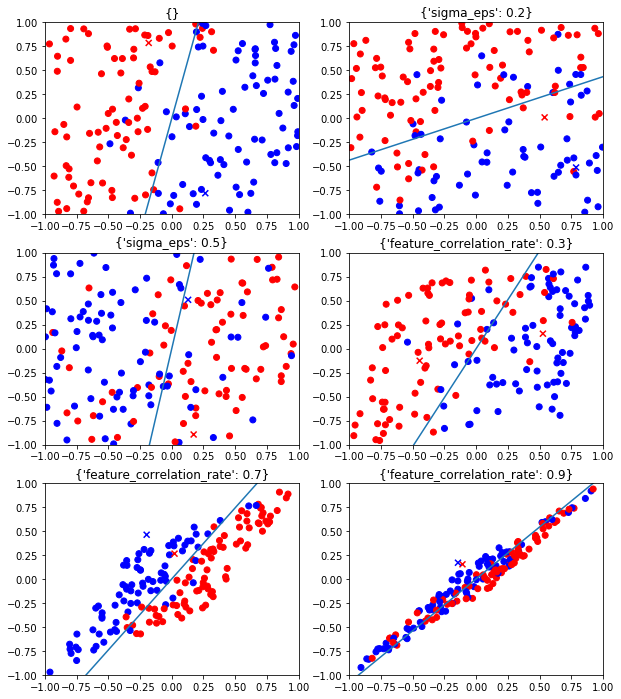

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1)) # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
    y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    assert len(X.shape) == 2
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)])
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[0], X_test[1], marker='x', color = point_color_arr)
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)
    
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict))
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
        
    plt.show()

test_draw()

**Q5.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $MX$ if $\alpha$ is either 0 or 1?

**Q5.1.1**  
If $\alpha = 0$, $M$ is just an identity matrix, $MX = X$.  
If $\alpha = 1$, $M$ is $\frac1n\mathbf 1_{n\times n}$ where $\mathbf 1_{n\times n}$ is a $n\times n$ all one matrix. So $MX$ is a row average on $X$. Each row of $MX$ is the average of rows in $X$. $MX_i = \frac1n \sum_{j=1}^N X_i$ 

**Q5.1.2**: Explain what happens in this line (use `numpy` documentation to learn about [transposition](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), [broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html), [negative indices](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#automatic-reshaping) for reshaping and [newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing))

    y = ((theta_real.T @ X + noise) > 0).astype(np.int16).reshape(-1, 1)

**Q5.1.2**  
`theta_real.T` is $\theta^T$, `noise` is $\epsilon$. So `(theta_real.T @ X + noise) > 0` is $\mathbf 1[X\theta + \epsilon > 0]$ which equals $\mathbf y$. `.astype(np.int16)` converts the boolean value into integar. `.reshape(-1, 1)` transforms the array into a column vector.

**Q5.1.3**: Why do we plot line $( (1, -\frac{\theta_0}{\theta_1}) ; (-1, \frac{\theta_0}{\theta_1}))$?

**Q5.1.3**  
To illustrate the real $\theta$ in the plots. The hyperplane $X\theta = \theta_0x_0 + \theta_1x_1 = 0$ is determined by two points $(x_0 = 1, x_1 = -\frac{\theta_0}{\theta_1})$ and $(x_0 = -1, x_1 = \frac{\theta_0}{\theta_1})$

**Q5.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

**Q5.2**  
We add an examination before we compute the real $\log(1 + \exp(x))$ to save computational resource. We only compute for the $x$ in a certain interval, otherwise, if $x$ is greater or less than a threshold (`limit` in the code), we just return its original value. For $x$ great enough, $1 + \exp(x) \simeq \exp(x)$ so $\log(1 + \exp(x)) \simeq x$. $\exp(x)$ is greater than $x$ when $x>0$ so this approach not only saves the computation but also avoids numerical overflow. For $x$ small enough, $\exp(x) \ll 1$ so $1 + \exp(x) \simeq 1\implies \log(1 + \exp(x)) \simeq \log(1) = 0$. So our approach can give a good approximation with desired accuracy without computing it, and also avoids the numerical underflow.

Numerical overflow is that the number calculated is greater than the maximal number the computer can represent. Numerical underflow is that the number calculated is too small in magnitude that computer cannot represent. Usually, when numerical underflow happens, the computer will raise an exception or if the computated results are not affected, it will be just ignored. When numerical overflow happens, it will leads to a bug so usually people make additional codes to deal with the overflow.

In [3]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q5.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q4.6, Q4.7**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [4]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    L = y.T @ X @ theta_current - softplus(X @ theta_current).T @ np.ones((len(y),1))\
        - lambd * norm(theta_current)    
    return -L ## ! -- code required

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    delta = -X.T @ (y - logistic(X @ theta_current)) + 2*lambd*theta_current
    return delta ## ! -- code required

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    y_predict = (X @ theta_current > 0).astype(np.int16).reshape((-1, 1))
    return 1 - np.abs(y - y_predict).sum()/len(y)

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta -= learning_rate * logistic_MAP_loss_gradient(X, y, theta, lambd)
        ## ! -- code required
        steps.append(theta.copy())
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            ## ! -- code required
            theta -= learning_rate * logistic_MAP_loss_single_gradient(X, y, smaple_id, theta, lambd)
        steps.append(theta.copy())
    return steps

gd runtime: 0.11437100000000555
sgd runtime: 2.540858999999955


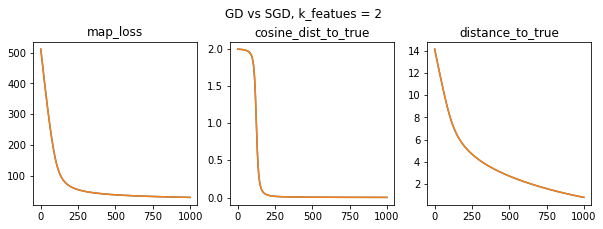

gd runtime: 0.5703770000000077
sgd runtime: 3.4843419999999696


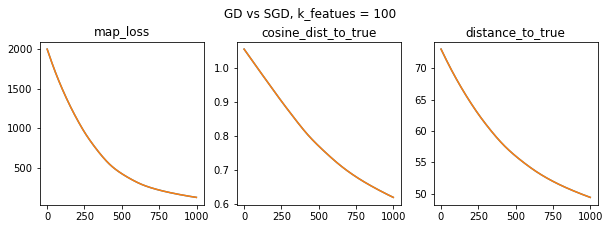

In [102]:
import time

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        
        plt.show()
    
main()

**Q5.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

**Q5.3.1**  
As we can see from the plots above, the $\text{loss}_{MAP}$ decreases during the gradient descent and sgd algorithms. The final values for map loss function of both gd and sgd algorithms are close to zero, meaning the final loss is really small. The distance between the true $\theta$ and the estimated $\hat\theta$ for k = 2 converges to a small value, indicating that the estimated $\hat\theta$ is very close to the original $\theta$. This can also be shown by the cosine distance which converges to about 0. When k = 100, both the Euclidean distance and cosine distance cannot converge to a small value due to the high dimensionality and insufficient eopchs. The gd and sgd algorithm get almost the same results in the experiments so their curves overlap each other in the plots above.

**Q5.4**: Complete the provided code below, and use it to draw several contour plots of logistic loss with different regularization parameter. Explain your results.

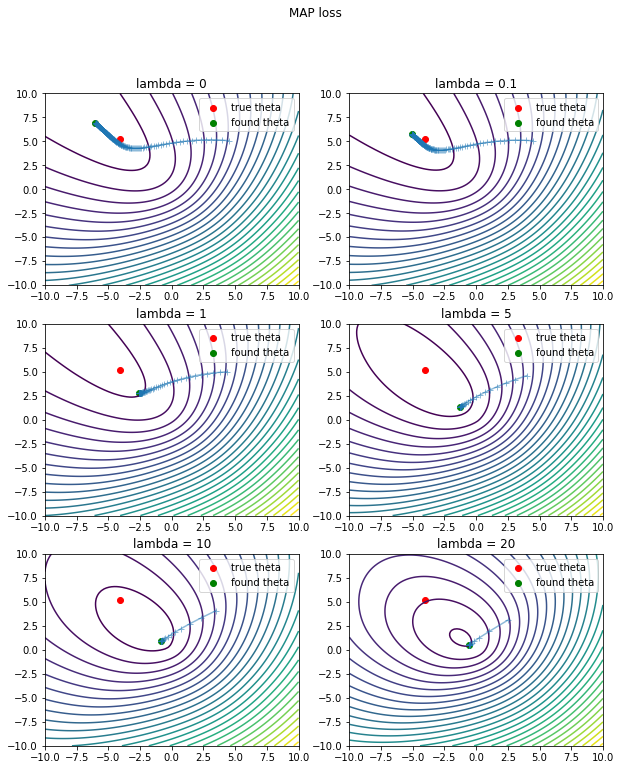

In [13]:
from itertools import product

def draw_f_contour(subfig, f, x_limits, n_lines=30, n=100):
    space = [np.linspace(*x_limit, n) for x_limit in x_limits]
    f_vals = np.array([f(np.array(v)) for v in product(*space)]).reshape(n, n).T
    subfig.set_xlim(*x_limits[0])
    subfig.set_ylim(*x_limits[1])
    subfig.contour(*space, f_vals, n_lines)
    
def draw_gd_steps(subfig, steps, func, theta_real):
    around_space = list([-10, 10] for coord in theta_real)
    draw_f_contour(subfig, func, around_space)
    subfig.plot(np.hstack(steps)[0], np.hstack(steps)[1], marker='+', alpha=0.5)
    subfig.scatter(*np.ravel(theta_real), c='r', label='true theta')
    theta_best = steps[-1]
    subfig.scatter(*np.ravel(theta_best), c='g', label='found theta') 

def main():
    data_args = dict(n_samples=200, k_featues=2, sigma_eps=0.1, sigma_theta=5)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    
    lambds = [0, 0.1, 1, 5, 10, 20]
    for lambd, subfig in subfig_iter(lambds, val_name='lambda', title='MAP loss'):
        steps = run_MAP_gd(X_train, y_train, lambd)
        draw_func = lambda theta: logistic_MAP_loss(X_train, y_train, theta, lambd) ## ! -- code required
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

**Q5.4**  
As we can see from the plots above, as the $\lambda$ increases, the minimum of the logistic loss is closer to the origin. The value of $\lambda$ controls the norm of $\hat\theta$.

**Q5.5**: Using the provided code below, draw several contour plots of logistic loss with different number of used samples. Explain your results.

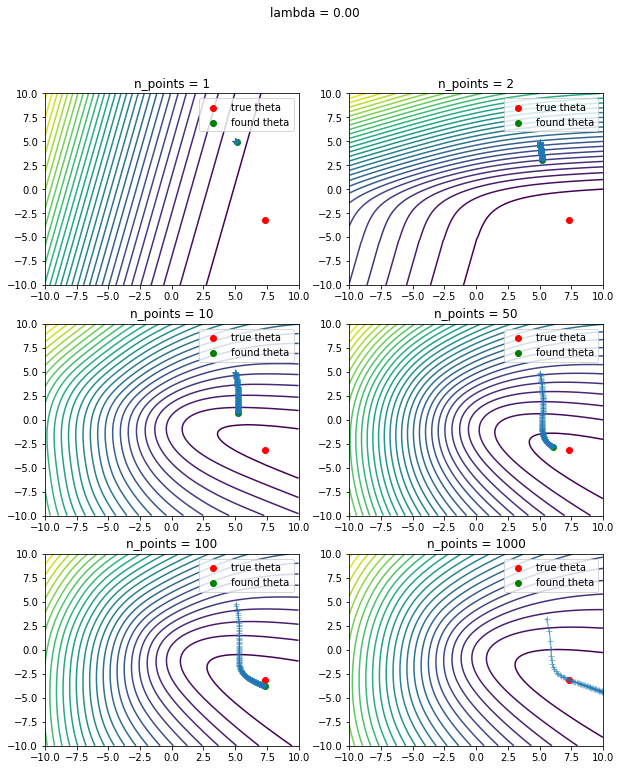

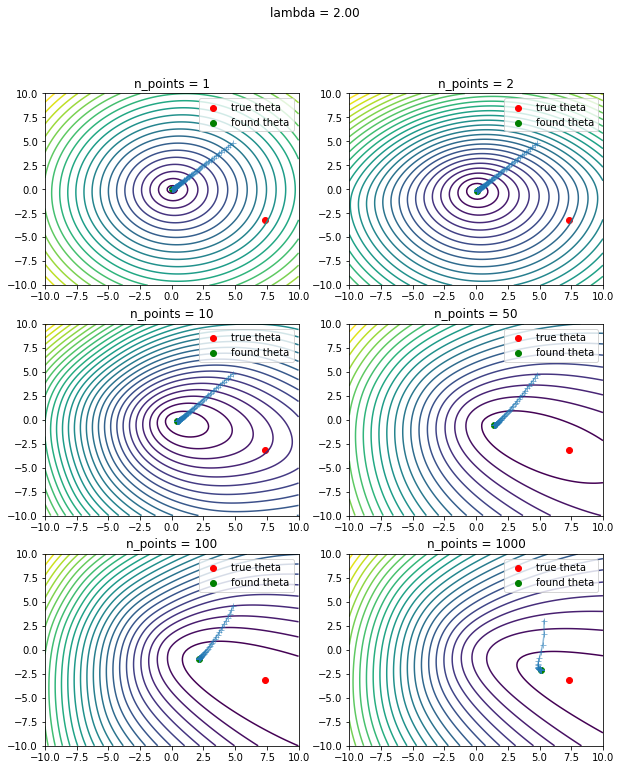

In [104]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data

    for lambd in [0.0, 2.0]:    
        n_points_s = [1, 2, 10, 50, 100, 1000]
        figure_args = dict(val_name='n_points', title='lambda = %.2f' % lambd)
        for n_points, subfig in subfig_iter(n_points_s, **figure_args):
            cropped_xy = (X_train[:n_points], y_train[:n_points])
            steps = run_MAP_gd(*cropped_xy, lambd)
            draw_func = lambda th: logistic_MAP_loss(*cropped_xy, th, lambd)
            draw_gd_steps(subfig, steps, draw_func, theta_real)
        plt.show()
        
main()

**Q5.5**  
When $\lambda = 0$, both the gd algorithm and the log loss function only depend on the training data. As the number of training data increases, the contour becomes more accurate, so does the estimated $\hat\theta$. When $n=100$, it gets the optimal estimation. But when $n = 1000$, the estimation is far from the true $\theta$.

When $\lambda = 2$, the algorithm and the log loss function depend on both the training data and the prior distribution. When the number of training data is small, e.g. $n=1$ or $n=2$, the log loss function is controlled by the prior distribution so the estimation is close to the origin. As the number of training data increases, the estimation is closer to the true value.

Comparing the results for the same n_point with different $\lambda$, we can see that, when $\lambda$ is bigger, the estimation is closer to the origin. This is the rule of the regularizer in our loss function.

**Q5.6**: Using the provided code below, draw several contour plots of logistic loss with different degrees of feature interdependence. Explain your results.

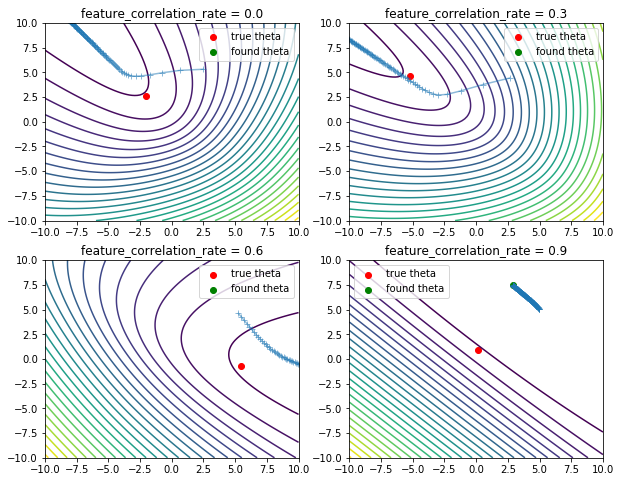

In [20]:
def main():
    rates = np.linspace(0, 0.9, 4)
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    for feature_correlation_rate, subfig in subfig_iter(rates, val_name='feature_correlation_rate'):
        data_args['feature_correlation_rate'] = feature_correlation_rate
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        steps = run_MAP_gd(X_train, y_train, 0)
        draw_func = lambda th: logistic_MAP_loss(X_train, y_train, th, 0)
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

**Q5.6**  
As the correaltion rate increases, the two feature dimensions are more correlated. This can be shown in the plots that the contour are closer to the diagonal.

**Q5.7**: Using the provided code below, draw plots of train\test loss with different parameters. Explain your results.

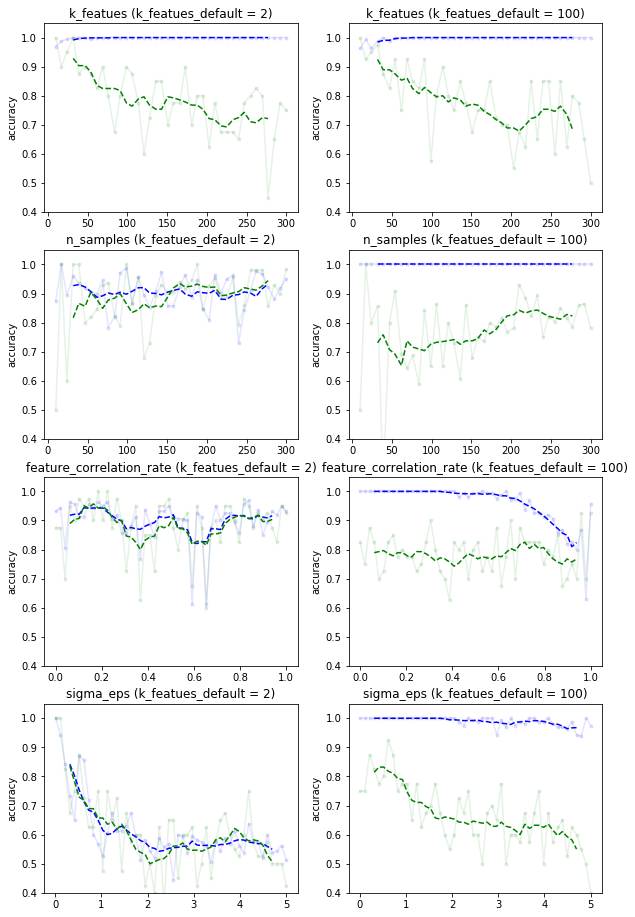

In [21]:
from collections import OrderedDict

def draw_losses():
    arg_ranges = OrderedDict([
        ('k_featues', np.linspace(10, 300, 40).astype(int)),
        ('n_samples', np.linspace(10, 300, 40).astype(int)),
        ('feature_correlation_rate', np.linspace(0, 1, 50).astype(float)),
        ('sigma_eps', np.linspace(0.01, 5, 50).astype(float)),
    ])

    k_range = [2, 100]
    l2_lambda = 0
    overall_iterator = subfig_iter(list(product(arg_ranges.items(), k_range)), n_col=2)
    for ((arg_name, arg_vals), k_featues_default), subfig in overall_iterator:
        collected_val_dics = []
        for arg_val in arg_vals:
            data_args = dict(n_samples=200, k_featues=k_featues_default, sigma_eps=0.1, 
                             sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4)
            data_args.update({arg_name: arg_val})
            data = generate_logistic_regression_data(**data_args)
            X_train, y_train, X_test, y_test, theta_real = data
            init_theta = np.zeros((data_args['k_featues'], 1))
            
            gd_args = dict(max_epoch_n=100, init_theta=init_theta)
            steps = run_MAP_gd(X_train, y_train, l2_lambda, **gd_args)
            best_theta = steps[-1]
            
            train_acc = logistic_classification_accuracy(X_train, y_train, best_theta)
            test_acc = logistic_classification_accuracy(X_test, y_test, best_theta)
            collected_val_dics.append(
                OrderedDict([
                    ('train_acc', train_acc),
                    ('test_acc', test_acc)
                ]))

        for key, color in zip(collected_val_dics[0].keys(), ['b', 'g']):
            subfig.set_title('%s (k_featues_default = %s)'%(arg_name, k_featues_default))
            track_vals = list(d[key] for d in collected_val_dics)
            subfig.plot(arg_vals, track_vals, marker='.', label=key, color=color, alpha=0.1)
            ws = 7
            assert ws % 2 == 1
            half_ws = int((ws-1)/2)
            track_vals_avg = np.convolve(track_vals, np.ones(ws)/ws, mode='valid')
            plot_args = dict(color=color, label=key+'_avg')
            subfig.plot(arg_vals[half_ws:-half_ws], track_vals_avg, '--', **plot_args)
            subfig.set_ylim(0.4, 1.05)
            subfig.set_ylabel('accuracy')
    plt.show()

draw_losses()

**Q5.7**  
From these results, we can find the following things:  
1. As the feature number increases, the accuracy on training data does not be affected, but the accuracy on test data decreases. The generalization ability of logistic regression decreases when dimensions increases.
2. The increase of training sample leads to higher accuracy on training data. The more, better.
3. The correlation between the features can affect the accuracy. Especially for k = 100, the accuracy on training data decreases as the correlation rate increases, but the accuracy on test data is not heavily affected.
4. As the standard deviation of the distribution for $\theta$ increases, the accuracy of logistic regression will decrease. When k = 100, the accuracy on training data is not heavily affected, but the accuracy on test data decreases.
5. Usually, the accuracy on training data for k = 100 is higher than k = 2.

.

.

.

Wow, you made it this far, that is impressive. Congratulations!